In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils
from keras import initializers
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 50

img_rows, img_cols = 28, 28         # input image dimensions
pool_size = (2, 2)                  # size of pooling area for max pooling
prob_drop_conv = 0.2                # drop probability for dropout @ conv layer
prob_drop_hidden = 0.5              # drop probability for dropout @ fc layer

In [3]:
def init_weights(shape, name=None):
    return initializers.normal(shape,name=name)
    #return initializers.normal(shape, scale=0.01, name=name)

In [4]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [5]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train original shape:', X_train.shape)

if K.image_dim_ordering() == 'th':
    # For Theano backend
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    # For TensorFlow backend
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train original shape: (60000, 28, 28)


In [6]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
# Convolutional model
model = Sequential()

# conv1 layer
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer='normal', padding='same'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv2 layer
model.add(Convolution2D(64, (3, 3), activation='relu', kernel_initializer='normal', padding='same'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv3 layer
model.add(Convolution2D(128, (3, 3), activation='relu', kernel_initializer='normal', padding='same'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), padding='same'))
model.add(Flatten())
model.add(Dropout(prob_drop_conv))

# fc1 layer
model.add(Dense(625, activation='relu', kernel_initializer='normal'))
model.add(Dropout(prob_drop_hidden))

# fc2 layer
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

opt = RMSprop(lr=0.001, rho=0.9)
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [10]:
# Train
history = model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s - loss: 0.4326 - acc: 0.8579 - val_loss: 0.0826 - val_acc: 0.9716
Epoch 2/50
60000/60000 [==============================] - 7s - loss: 0.1179 - acc: 0.9634 - val_loss: 0.0498 - val_acc: 0.9831
Epoch 3/50
60000/60000 [==============================] - 7s - loss: 0.0884 - acc: 0.9729 - val_loss: 0.0381 - val_acc: 0.9870
Epoch 4/50
60000/60000 [==============================] - 7s - loss: 0.0730 - acc: 0.9772 - val_loss: 0.0345 - val_acc: 0.9881
Epoch 5/50
60000/60000 [==============================] - 7s - loss: 0.0623 - acc: 0.9806 - val_loss: 0.0285 - val_acc: 0.9898
Epoch 6/50
60000/60000 [==============================] - 7s - loss: 0.0565 - acc: 0.9828 - val_loss: 0.0254 - val_acc: 0.9911
Epoch 7/50
60000/60000 [==============================] - 7s - loss: 0.0501 - acc: 0.9841 - val_loss: 0.0234 - val_acc: 0.9922
Epoch 8/50
60000/60000 [==============================] - 7s 

In [11]:
# Evaluate
evaluation = model.evaluate(X_test, Y_test, batch_size=256, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

 8448/10000 [========================>.....] - ETA: 0s
Summary: Loss over the test dataset: 0.02, Accuracy: 0.99


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


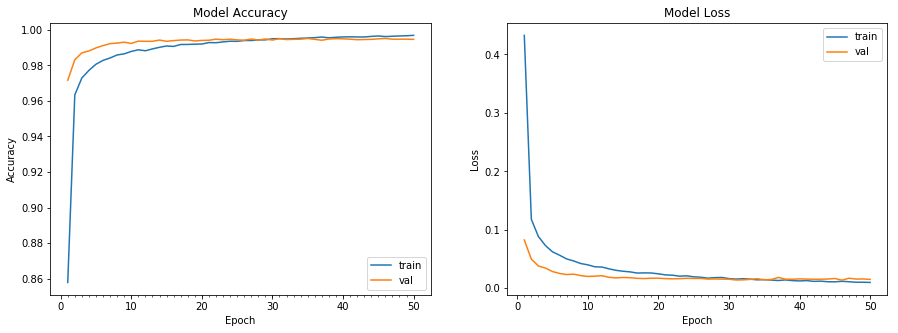

In [15]:
# list all data in history
print(history.history.keys())
plot_model_history(history)